Import Library Yang Dibutuhkan

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Baca File Dataset

In [86]:
data = pd.read_csv('https://raw.githubusercontent.com/Aerysh/Pembelajaran_Mesin/main/kendaraan_train.csv')
data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# Eksplorasi Data

In [87]:
data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Ubah Value di Sebuah Kolom Jika Dibutuhkan

In [88]:
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Tidak'], 0)
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace(['Pernah'], 1)
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,0.0,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,0.0,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,0.0,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,0.0,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,0.0,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,0.0,30503.0,124.0,270.0,0


Memilih Kolom Yang Dibutuhkan

In [89]:
selColumn = ['Premi', 'Lama_Berlangganan']
newData = data[selColumn]
newData

,Premi,Lama_Berlangganan
0,28029.0,97.0
1,25800.0,158.0
2,32733.0,119.0
3,2630.0,63.0
4,34857.0,194.0
...,...,...
285826,25988.0,217.0
285827,44686.0,50.0
285828,49751.0,226.0
285829,30503.0,270.0


# Preprocessing Data

Cek Banyak Data Duplikat & Hapus Data Duplikat





In [90]:
dupe = newData.duplicated()
print('Total Data Duplikat =', dupe.sum())
data = newData.drop_duplicates()
print('Total Data Setelah Dihapus = ', data.shape[0])

Total Data Duplikat = 64475
Total Data Setelah Dihapus =  221356


Cek Banyak Data Kosong

In [91]:
data.isnull().sum()

Premi                 291
Lama_Berlangganan    9339
dtype: int64

Delete Data Yang Kosong

In [92]:
newData = data.dropna()

# Cek Data Yang Kosong
newData.isnull().sum()

Premi                0
Lama_Berlangganan    0
dtype: int64

# Outliers

In [93]:
newDataO = newData

Box Plot Outliers

<Figure size 1000x750 with 0 Axes>

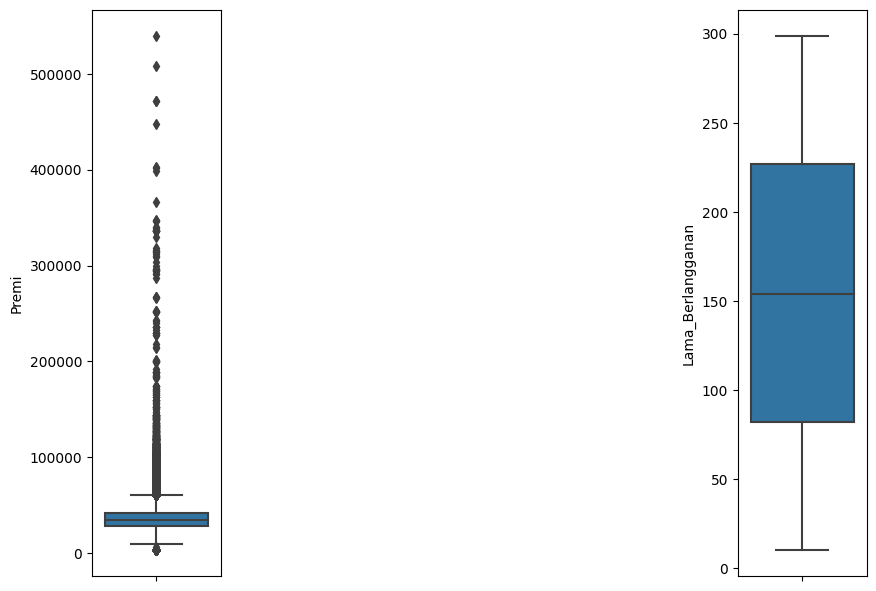

In [132]:
import seaborn as sns

selColumnLength = len(set(selColumn))
plt.figure(figsize=(10,7.5))
f, axes = plt.subplots(1, selColumnLength)
sns.boxplot(y=newData['Premi'], ax=axes[0])
sns.boxplot(y=newData['Lama_Berlangganan'], ax=axes[1])
plt.subplots_adjust(wspace=4)

Scatter Plot Outliers

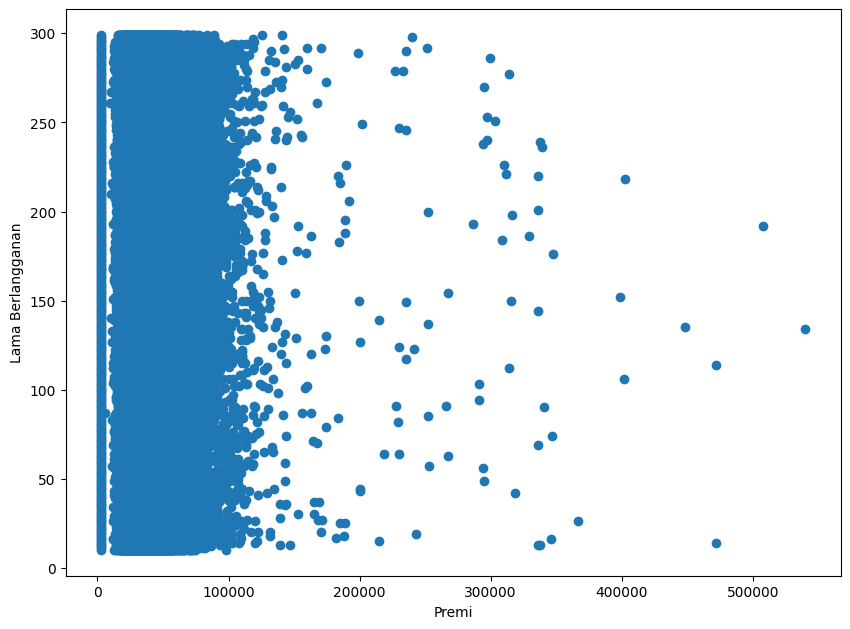

In [134]:
fig, ax = plt.subplots(figsize=(10,7.5))
ax.scatter(newData['Premi'], newData['Lama_Berlangganan'])
ax.set_xlabel('Premi')
ax.set_ylabel('Lama Berlangganan')
plt.show()

Mencari Z-Score

In [96]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(newData))
print(z)

[[0.64614931 0.68320514]
 [0.8211564  0.04536486]
 [0.27682076 0.42044219]
 ...
 [0.66165376 1.24456235]
 [1.05932576 0.85754125]
 [0.01737015 1.31622497]]


In [97]:
z.shape

(211727, 2)

In [98]:
threshold = 3
print(np.where(z > 3))

(array([     9,     37,     52, ..., 211565, 211622, 211678]), array([0, 0, 0, ..., 0, 0, 0]))


In [99]:
print("Z-Score = ", z[52][0])

Z-Score =  5.269310070587843


**Hapus Outliers**

In [100]:
newDataO = newDataO[(z < 3).all(axis=1)]

In [101]:
newData.shape

(211727, 2)

In [102]:
newDataO.shape

(209441, 2)

In [103]:
# IQR Score

newDataO1 = newData
Q1 = newDataO1.quantile(0.25)
Q3 = newDataO1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Premi                12896.5
Lama_Berlangganan      145.0
dtype: float64


In [104]:
newDataOut = newDataO1[~((newDataO1 < (Q1 - 1.5 * IQR)) |(newDataO1 > (Q3 + 1.5 * IQR))).any(axis=1)]
newDataOut.shape

(203788, 2)

# Scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler().fit_transform(newDataOut)
scaling

array([[0.3579177 , 0.30103806],
       [0.3141139 , 0.51211073],
       [0.45035963, 0.37716263],
       ...,
       [0.68525724, 0.1384083 ],
       [0.78479346, 0.74740484],
       [0.52399481, 0.11764706]])

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaling)
data_new = pd.DataFrame(data = principalComponents, columns = ['x', 'y'])
data_new.head()

,x,y
0,-0.198332,-0.133274
1,0.012639,-0.177568
2,-0.121993,-0.041009
3,0.137619,0.000128
4,0.057481,-0.237905


In [107]:
newX = MinMaxScaler().fit_transform(data_new)
newX

array([[0.30108947, 0.35851551],
       [0.51159652, 0.31431021],
       [0.37726093, 0.45059556],
       ...,
       [0.13957603, 0.6855756 ],
       [0.7474643 , 0.78350032],
       [0.11848664, 0.52468472]])

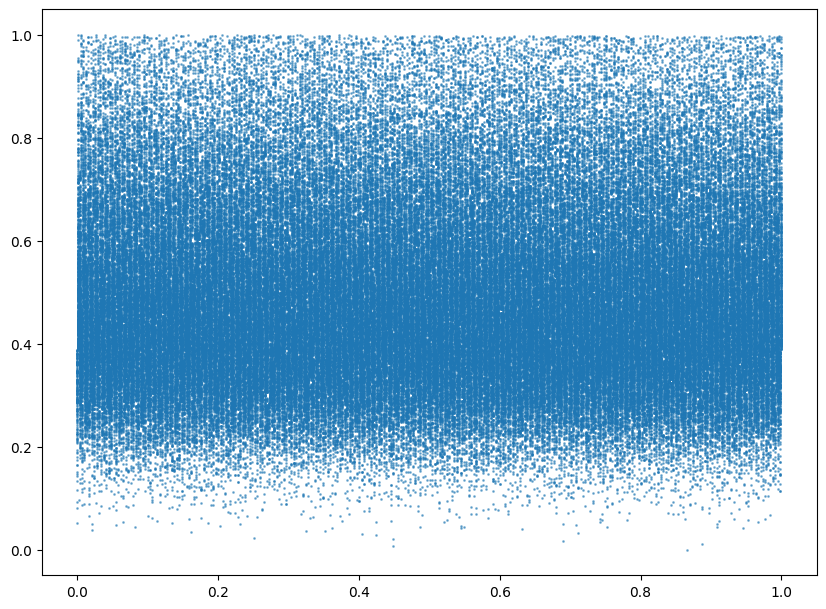

In [130]:
plt.figure(figsize=(10,7.5))
plt.scatter(newX[:,0], newX[:,1], s=1, cmap ='plasma', alpha=.5)
plt.show()

In [109]:
X = data_new.copy().values
X = MinMaxScaler(feature_range=(0,10)).fit_transform(X)

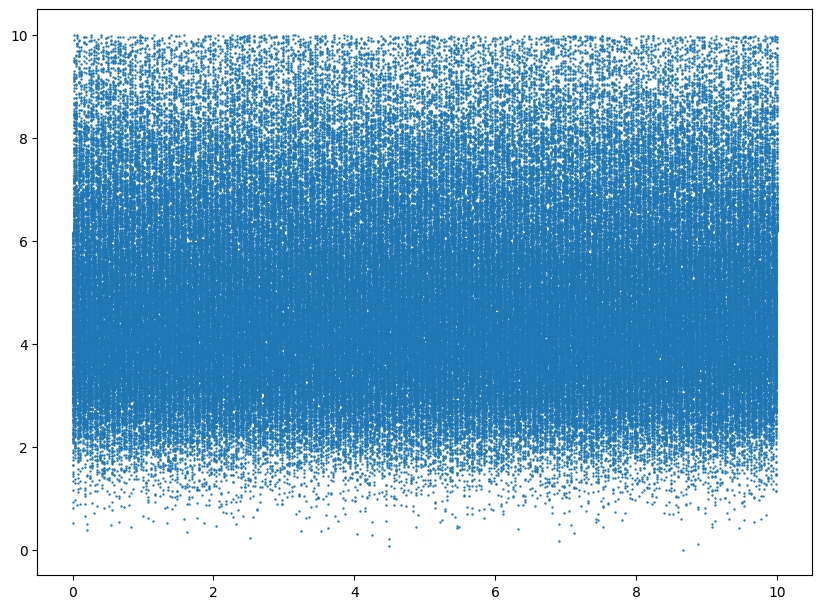

In [129]:
plt.figure(figsize=(10,7.5))
plt.scatter(X[:,0], X[:,1], s=.5, cmap ='plasma')
plt.show()

# Clustering

Nilai K

In [111]:
K = 5

In [112]:
m=X.shape[0]
n=X.shape[1]
n_iter=5
import random

Membuat Array Kosong Untuk Centroid

In [113]:
centroids = np.array([]).reshape(n, 0)

Membuat 5 Centroid Random

In [114]:
for k in range(K):
  centroids = np.c_[centroids, X[random.randint(0, m-1)]]

In [115]:
output = {}

Membuat Array Kosong

In [116]:
euclid=np.array([]).reshape(m,0)

Mencari Jarak Antar Centroid

In [117]:
for k in range(K):
  dist=np.sum((X-centroids[:,k])**2,axis=1)
  euclid=np.c_[euclid,dist]  

Menyimpan Minimum Value

In [118]:
min=np.argmin(euclid,axis=1)+1

Mencari Mean Dari Cluster

In [119]:
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

Menetapkan Sebuah Cluster Ke Sebuah Titik

In [120]:
for k in range(m):
  cent[min[k]]=np.c_[cent[min[k]],X[k]]
for k in range(K):
  cent[k+1]=cent[k+1].T

Menghitung Ulang Mean

In [121]:
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

Mengulang Semua Step Diatas

In [122]:
for i in range(n_iter):
  euclid=np.array([]).reshape(m,0)
  for k in range(K):
    dist=np.sum((X-centroids[:,k])**2,axis=1)
    euclid=np.c_[euclid,dist]
  C=np.argmin(euclid,axis=1)+1
  cent={}
  for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)
  for k in range(m):
    cent[C[k]]=np.c_[cent[C[k]],X[k]]
  for k in range(K):
    cent[k+1]=cent[k+1].T
  for k in range(K):
    centroids[:,k]=np.mean(cent[k+1],axis=0)
  final=cent

Output Plottingan

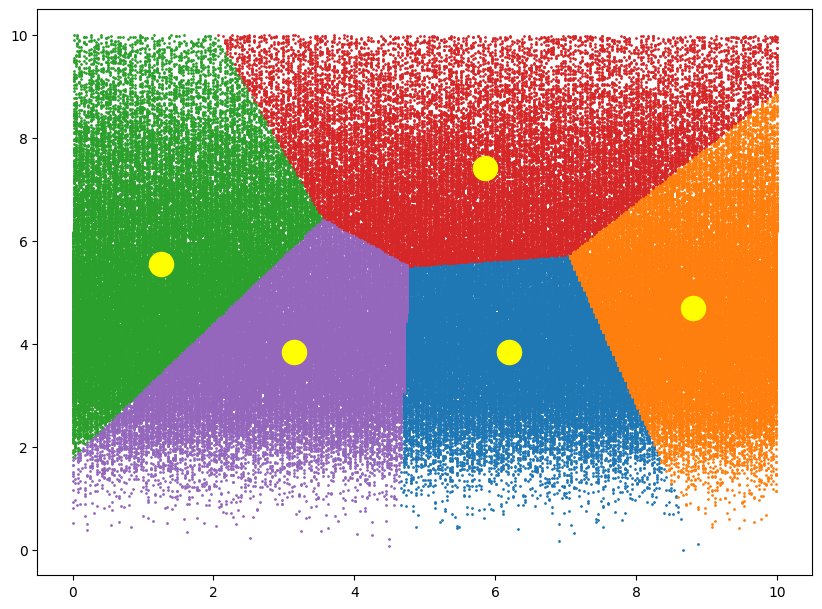

In [128]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1], s=1)
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

# Evaluasi Nilai Optimum K

Import Library

In [124]:
from sklearn.cluster import KMeans

Buat Array Kosong

In [125]:
elbow=[]

In [126]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

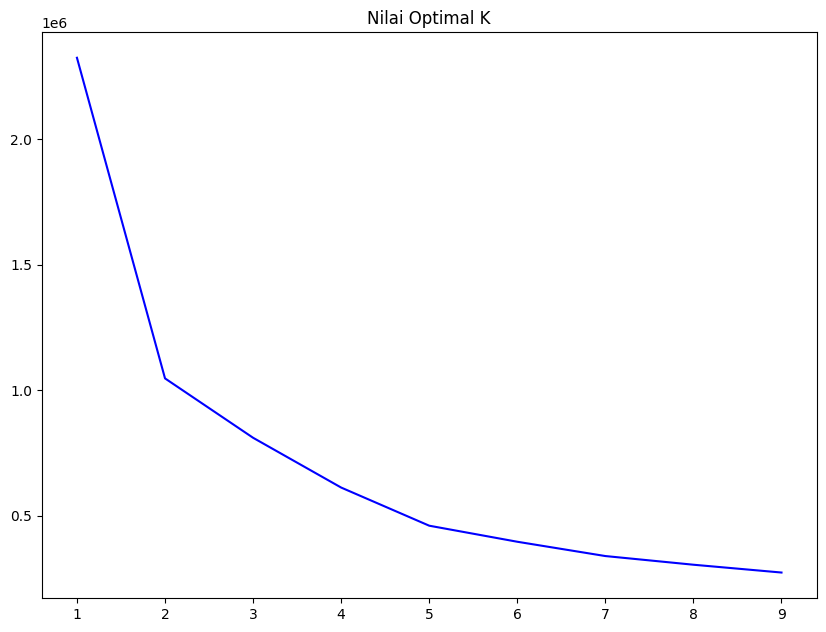

In [127]:
sns.lineplot(range(1, 10), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Nilai Optimal K')
plt.show()